In [16]:
import itertools
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model_linear = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, 'softmax')
])

model_linear.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
history_linear = model_linear.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.6001 - acc: 0.7963 - val_loss: 0.5153 - val_acc: 0.8206
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.4609 - acc: 0.8417 - val_loss: 0.4731 - val_acc: 0.8354
Epoch 3/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.4351 - acc: 0.8491 - val_loss: 0.4624 - val_acc: 0.8384
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.4221 - acc: 0.8544 - val_loss: 0.4627 - val_acc: 0.8406
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.4133 - acc: 0.8565 - val_loss: 0.4531 - val_acc: 0.8411
Epoch 6/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.4071 - acc: 0.8597 - val_loss: 0.4573 - val_acc: 0.8374
Epoch 7/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.4022 - acc: 0.8606 - val_loss: 0.4494 - val_ac

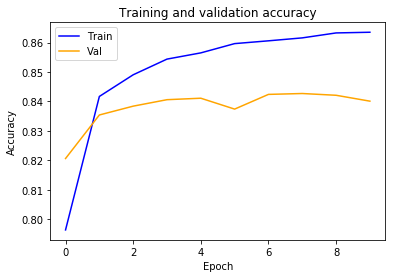

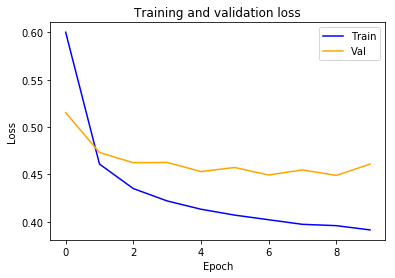

In [6]:
# The history object contains results on the training and test
# sets for each epoch
acc = history_linear.history['acc']
val_acc = history_linear.history['val_acc']
loss = history_linear.history['loss']
val_loss = history_linear.history['val_loss']

# Get the number of epochs
epochs = range(len(acc))

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='blue', label='Train')
plt.plot(epochs, val_acc, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

_ = plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='blue', label='Train')
plt.plot(epochs, val_loss, color='orange', label='Val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [7]:
model_deep = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, 'relu'),
    Dense(128, 'relu'),
    Dense(64, 'relu'),
    Dense(10, 'softmax')
])

model_deep.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history_deep = model_deep.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.4832 - acc: 0.8255 - val_loss: 0.4798 - val_acc: 0.8249
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.3684 - acc: 0.8655 - val_loss: 0.3920 - val_acc: 0.8568
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.3307 - acc: 0.8790 - val_loss: 0.3606 - val_acc: 0.8706
Epoch 4/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3093 - acc: 0.8855 - val_loss: 0.3532 - val_acc: 0.8711
Epoch 5/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.2884 - acc: 0.8933 - val_loss: 0.3598 - val_acc: 0.8760
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2754 - acc: 0.8978 - val_loss: 0.3671 - val_acc: 0.8704
Epoch 7/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.2632 - acc: 0.9014 - val_loss: 0.3304 - val_acc

In [9]:
model_deep.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


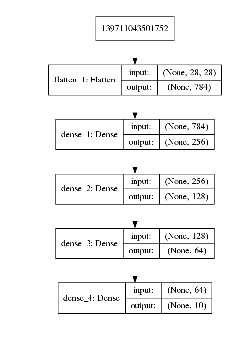

In [10]:
image_path = 'model_deep.png'
keras.utils.plot_model(model_deep, 
                       show_shapes=True,
                       to_file=image_path)

plt.figure(dpi=100)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.show()

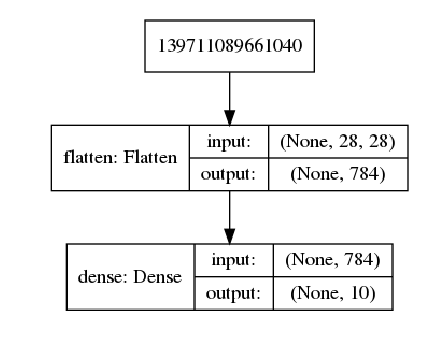

In [11]:
image_path = 'model_linear.png'
keras.utils.plot_model(model_linear, 
                       show_shapes=True,
                       to_file=image_path)

plt.figure(dpi=100)
imgplot = plt.imshow(mpimg.imread(image_path))
plt.axis('off')
plt.show()

In [12]:
predict = model_deep.predict(test_images)

In [13]:
predictions = np.argmax(predict, axis=1)

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[896   2  13  24   2   0  58   0   5   0]
 [  1 978   2  17   0   0   1   0   1   0]
 [ 27   0 786  15 121   0  48   0   3   0]
 [ 27  10   7 911  28   0  12   0   5   0]
 [  1   1  71  36 852   0  31   0   8   0]
 [  0   0   0   1   0 972   0  17   1   9]
 [182   0  68  40  97   0 603   0  10   0]
 [  0   0   0   0   0  15   0 956   1  28]
 [  3   0   2  10   4   2   5   2 972   0]
 [  0   0   0   1   0  13   1  31   0 954]]
Normalized confusion matrix
[[0.9  0.   0.01 0.02 0.   0.   0.06 0.   0.01 0.  ]
 [0.   0.98 0.   0.02 0.   0.   0.   0.   0.   0.  ]
 [0.03 0.   0.79 0.01 0.12 0.   0.05 0.   0.   0.  ]
 [0.03 0.01 0.01 0.91 0.03 0.   0.01 0.   0.01 0.  ]
 [0.   0.   0.07 0.04 0.85 0.   0.03 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.97 0.   0.02 0.   0.01]
 [0.18 0.   0.07 0.04 0.1  0.   0.6  0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.96 0.   0.03]
 [0.   0.   0.   0.01 0.   0.   0.01 0.   0.97 0.  ]
 [0.   0.   0.   0.   0.

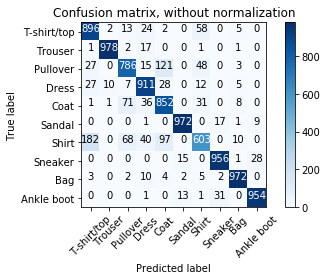

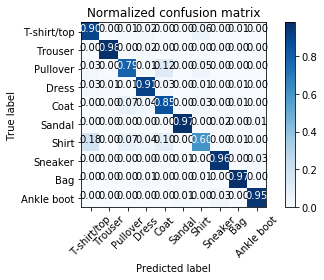

In [15]:
class_names = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')